In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
import mglearn

<h1>2クラス分類の基準</h1>

<h4>偏ったデータセット</h4>

In [3]:
# 2クラス分類の場合には、2つのクラスを陽性クラスと陰性クラスと呼び、探しているものを陽性と呼ぶ
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

In [4]:
# 一方を常に予測しているだけで90%が達成できてしまう問題もあるのだ
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = "most_frequent").fit(X_train, y_train)
# most_frequent、つまり常に「9以外」と予測（？）する
pred_most_frequent = dummy_majority.predict(X_test)
print(f"Unique predicted labels: {np.unique(pred_most_frequent)}")
print(f"Test score: {dummy_majority.score(X_test, y_test):.2f}")

Unique predicted labels: [False]
Test score: 0.90


In [5]:
# 精度でいうと、DecisionTreeClassifierは常に同じ答えを返す予測器よりも少し良いだけだ
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(f"Test score: {tree.score(X_test, y_test):.2f}")

Test score: 0.92


In [6]:
# ランダムな分類器ですら90%の精度を達成している
# 偏ったデータセットに対する予測性能を定量化する基準として、精度は不適切だということだ
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
# 前述と違い、完全にランダムに（9かそれ以外かを）予測する
pred_dummy = dummy.predict(X_test)
print(f"dummy score: {dummy.score(X_test, y_test):.2f}")

logreg = LogisticRegression(C = 0.1, max_iter = 10000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(f"logreg score: {logreg.score(X_test, y_test):.2f}")

dummy score: 0.90
logreg score: 0.98


<h4>混同行列</h4>

In [7]:
# 2クラス分類の評価結果を表現する方法で、最も包括的な方法の1つとして混同行列（confusion matrix）がある
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print(f"Confusion matrix:\n{confusion}")

Confusion matrix:
[[402   1]
 [  6  41]]


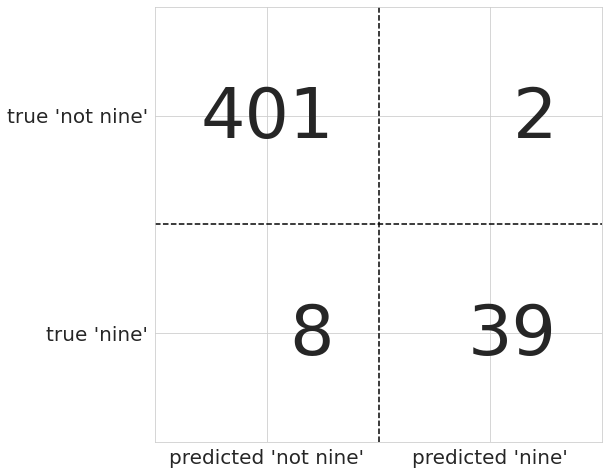

In [8]:
mglearn.plots.plot_confusion_matrix_illustration()

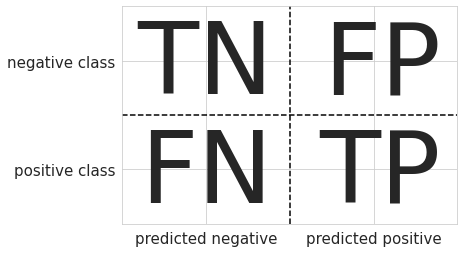

In [9]:
mglearn.plots.plot_binary_confusion_matrix()

In [10]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("")
print("Dummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("")
print("Decision Tree:")
print(confusion_matrix(y_test, pred_tree))
print("")
print("Logistic Regression:")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[403   0]
 [ 47   0]]

Decision Tree:
[[390  13]
 [ 24  23]]

Logistic Regression:
[[402   1]
 [  6  41]]


In [11]:
# 精度=(TP + TN)/(TP+TN+FP+FN)
# 適合率=TP/(TP+FP)、適合率(precision)は、陽性であると予測されたものがどれくらい実際に陽性であったかを測定する
# 再現率=TP/(TP+FN)、再現率（recall）は、実際に陽性サンプルのうち、陽性と予測されたものの割合と定義される
# 再現率の最適化と適合率の最適化はトレードオフの関係にある
# 適合率と再現率をまとめる方法の1つがf-スコアもしくはf-値（f-measure）である。これは適合率と再現率の調和平均である
# f = 2/(1/適合率 + 1/再現率)
# この値は適合率と再現率の双方を取り入れているので、偏った2クラス分類データセットに対して、精度よりも良い基準となる
from sklearn.metrics import f1_score

print(f"f1 score most frequent: {f1_score(y_test, pred_most_frequent):.2f}")
print(f"f1 score dummy: {f1_score(y_test, pred_dummy):.2f}")
print(f"f1 score tree: {f1_score(y_test, pred_tree):.2f}")
print(f"f1 score logistic regression: {f1_score(y_test, pred_logreg):.2f}")

f1 score most frequent: 0.00
f1 score dummy: 0.00
f1 score tree: 0.55
f1 score logistic regression: 0.92


In [12]:
# 適語率、再現率、f-値をまとめた包括的なレポートを得るには、便利なclassification_report関数を用いればよい
# f-値の隣の最後の列には個々のクラスの支持度（support）が出力される。これは、そのクラスの実際のサンプルの個数である
# クラス分類レポートの最後の行は、適合率や再現率を（各クラスのサンプルの個数で）重み付けした平均値である
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent, target_names = ["not nine", "nine"], zero_division = 1))
print(classification_report(y_test, pred_dummy, target_names = ["not nine", "nine"], zero_division = 1))
print(classification_report(y_test, pred_logreg, target_names = ["not nine", "nine"]))

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       1.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.95      0.50      0.47       450
weighted avg       0.91      0.90      0.85       450

              precision    recall  f1-score   support

    not nine       0.90      1.00      0.94       403
        nine       1.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.95      0.50      0.47       450
weighted avg       0.91      0.90      0.85       450

              precision    recall  f1-score   support

    not nine       0.99      1.00      0.99       403
        nine       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



<h1>Summary</h1>

<h4>Decision Function(決定関数)</h4>
・2クラス分類の場合<br>
⇒<br>
decision_functionの結果の配列は(n_samples,)の形になり、サンプルごとに一つの浮動小数点が返される<br>
値が正であれば陽性クラスを、負であれば陰性（つまり陽性以外）クラスを意味する<br>
decision_functionのレンジは決まっておらず、データとモデルパラメータに依存するため、どのようなスケールで結果が表示されるかわからず解釈が難しい<br>
・多クラス分類の場合<br>
⇒<br>
decision_funcitonの結果の配列は(n_samples, n_classes)の形になる<br>
各列は個々のクラスに対する「確信度スコア」で、大きいとそのクラスである可能性が高く、小さくなると可能性が低くなる。各データポイントに対して、確信度スコアが最大になるクラスを選ぶことで予測クラスが得られる<br>

<h4>predict proba</h4>
・2クラス分類の場合<br>
⇒<br>
predict_probaの出力は、それぞれのクラスに属する確率で、decision_functionの出力よりも理解しやすい<br>
出力配列の形は、2クラス分類問題では、常に(n_samples, 2)になる<br>
各行の第一エントリは第一クラスの予測確率で、第二エントリは第二クラスの予測確率である。確率なので、predict_probaの出力は常に0から1であり、双方の和は常に1になっている<br>
2つのクラスの確率の和が1なので、どちらかが50%以上の確率（確信度）になっており、そのクラスが予測クラスになる<br>
・多クラス分類の場合<br>
⇒<br>
predict_probaの出力も、decision_functionと同じで、(n_samples, n_classes)の形の配列となる<br>
各クラスになる確率の和は1になる<br>
<br>
※注意<br>
predictで得られた結果をdecision_functionやpredict_probaで得られた結果と比較する際には、クラスが文字列だったり等、0から始まる整数で表現されていない場合には、クラス分類器のclasses_属性を使って、実際のクラス名を使うようにしなければならない

<h1>2クラス分類の場合</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
from sklearn.datasets import make_circles

In [3]:
X, y = make_circles(noise = 0.25, factor = 0.5, random_state = 1)
y_named = np.array(["blue", "red"])[y]

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train_named, y_test_named, y_train, y_test = train_test_split(X , y_named, y, random_state = 0)

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
gbrt = GradientBoostingClassifier(random_state = 0).fit(X_train, y_train_named)

In [8]:
decision_function = gbrt.decision_function(X_test)
decision_function

array([ 4.13592603, -1.70169917, -3.95106099, -3.62609552,  4.28986642,
        3.66166081, -7.69097179,  4.11001686,  1.10753937,  3.40782222,
       -6.46255955,  4.28986642,  3.90156346, -1.20031247,  3.66166081,
       -4.17231157, -1.23010079, -3.91576223,  4.03602783,  4.11001686,
        4.11001686,  0.65709014,  2.69826265, -2.65673274, -1.86776596])

In [9]:
gbrt.classes_

array(['blue', 'red'], dtype='<U4')

In [10]:
pred = gbrt.classes_[(decision_function > 0).astype(int)]
pred

array(['red', 'blue', 'blue', 'blue', 'red', 'red', 'blue', 'red', 'red',
       'red', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'blue', 'blue',
       'red', 'red', 'red', 'red', 'red', 'blue', 'blue'], dtype='<U4')

In [11]:
np.all(pred == gbrt.predict(X_test))

True

In [12]:
print(f"Decision function minimum: {np.min(decision_function): .2f}")
print(f"Decision function maximum: {np.max(decision_function): .2f}")

Decision function minimum: -7.69
Decision function maximum:  4.29


In [13]:
predict_proba = gbrt.predict_proba(X_test)
predict_proba

array([[1.57362639e-02, 9.84263736e-01],
       [8.45756526e-01, 1.54243474e-01],
       [9.81128693e-01, 1.88713075e-02],
       [9.74070327e-01, 2.59296728e-02],
       [1.35214212e-02, 9.86478579e-01],
       [2.50463747e-02, 9.74953625e-01],
       [9.99543275e-01, 4.56725221e-04],
       [1.61426376e-02, 9.83857362e-01],
       [2.48329911e-01, 7.51670089e-01],
       [3.20518935e-02, 9.67948107e-01],
       [9.98441637e-01, 1.55836338e-03],
       [1.35214212e-02, 9.86478579e-01],
       [1.98099245e-02, 9.80190075e-01],
       [7.68580365e-01, 2.31419635e-01],
       [2.50463747e-02, 9.74953625e-01],
       [9.84817480e-01, 1.51825198e-02],
       [7.73836215e-01, 2.26163785e-01],
       [9.80463909e-01, 1.95360915e-02],
       [1.73607896e-02, 9.82639210e-01],
       [1.61426376e-02, 9.83857362e-01],
       [1.61426376e-02, 9.83857362e-01],
       [3.41393574e-01, 6.58606426e-01],
       [6.30759509e-02, 9.36924049e-01],
       [9.34424749e-01, 6.55752512e-02],
       [8.661995

In [14]:
predict_proba.sum(axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1.])

<h1>多クラス分類の場合</h1>

In [15]:
from sklearn.datasets import load_iris

In [16]:
iris = load_iris()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 42)

In [18]:
gbrt = GradientBoostingClassifier(learning_rate = 0.01, random_state = 0).fit(X_train, y_train)

In [19]:
decision_function = gbrt.decision_function(X_test)
decision_function

array([[-1.995715  ,  0.04758267, -1.92720695],
       [ 0.06146394, -1.90755736, -1.92793758],
       [-1.99058203, -1.87637861,  0.09686725],
       [-1.995715  ,  0.04758267, -1.92720695],
       [-1.99730159, -0.13469108, -1.20341483],
       [ 0.06146394, -1.90755736, -1.92793758],
       [-1.995715  ,  0.04758267, -1.92720695],
       [-1.99677434, -1.87637861,  0.09686725],
       [-1.995715  ,  0.04758267, -1.92720695],
       [-1.995715  ,  0.04758267, -1.92720695],
       [-1.99677434, -1.87637861,  0.07863156],
       [ 0.06146394, -1.90755736, -1.92793758],
       [ 0.06146394, -1.90755736, -1.92793758],
       [ 0.06146394, -1.90755736, -1.92793758],
       [ 0.06146394, -1.90755736, -1.92793758],
       [-1.995715  ,  0.04758267, -1.92720695],
       [-1.99087515, -1.87637861,  0.09686725],
       [-1.995715  ,  0.04758267, -1.92720695],
       [-1.995715  ,  0.04758267, -1.92720695],
       [-1.99087515, -1.87637861,  0.09686725],
       [ 0.06146394, -1.90755736, -1.927

In [20]:
np.all(np.argmax(decision_function, axis = 1) == gbrt.predict(X_test))

True

In [21]:
predict_proba = gbrt.predict_proba(X_test)
predict_proba

array([[0.10217718, 0.78840034, 0.10942248],
       [0.78347147, 0.10936745, 0.10716108],
       [0.09818072, 0.11005864, 0.79176065],
       [0.10217718, 0.78840034, 0.10942248],
       [0.10360005, 0.66723901, 0.22916094],
       [0.78347147, 0.10936745, 0.10716108],
       [0.10217718, 0.78840034, 0.10942248],
       [0.09763381, 0.11012538, 0.79224081],
       [0.10217718, 0.78840034, 0.10942248],
       [0.10217718, 0.78840034, 0.10942248],
       [0.09905185, 0.11172485, 0.78922331],
       [0.78347147, 0.10936745, 0.10716108],
       [0.78347147, 0.10936745, 0.10716108],
       [0.78347147, 0.10936745, 0.10716108],
       [0.78347147, 0.10936745, 0.10716108],
       [0.10217718, 0.78840034, 0.10942248],
       [0.09815477, 0.1100618 , 0.79178343],
       [0.10217718, 0.78840034, 0.10942248],
       [0.10217718, 0.78840034, 0.10942248],
       [0.09815477, 0.1100618 , 0.79178343],
       [0.78347147, 0.10936745, 0.10716108],
       [0.10178234, 0.11626145, 0.78195621],
       [0.

In [22]:
np.sum(predict_proba,axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [23]:
np.all(np.argmax(predict_proba, axis = 1) == gbrt.predict(X_test))

True

In [24]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [25]:
named_target = iris.target_names[y_train]

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logreg = LogisticRegression().fit(X_train, named_target)

In [28]:
decision_function = logreg.decision_function(X_test)
decision_function

array([[ -3.03499321,   2.29425248,   0.74074073],
       [  5.91897443,   3.09086203,  -9.00983646],
       [-10.05185482,   1.8745736 ,   8.17728122],
       [ -2.7327919 ,   2.03622628,   0.69656562],
       [ -3.73730761,   2.475568  ,   1.2617396 ],
       [  6.03557963,   3.03459875,  -9.07017838],
       [ -0.28246979,   2.17692712,  -1.89445733],
       [ -5.08438189,   1.70755665,   3.37682525],
       [ -3.45483147,   2.35294938,   1.10188209],
       [ -1.14537934,   2.34758244,  -1.2022031 ],
       [ -4.54163979,   1.696957  ,   2.84468279],
       [  6.42918453,   3.10051706,  -9.52970159],
       [  6.75151419,   3.24338038,  -9.99489456],
       [  6.24916678,   3.09796127,  -9.34712805],
       [  6.61880949,   2.83424536,  -9.45305485],
       [ -3.046041  ,   1.94572148,   1.10031951],
       [ -6.55404992,   1.46148012,   5.0925698 ],
       [ -1.15322751,   2.38303184,  -1.22980433],
       [ -2.51135658,   2.0641394 ,   0.44721718],
       [ -6.23295266,   1.51653

In [29]:
pred = logreg.classes_[np.argmax(decision_function, axis = 1)]
pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa'], dtype='<U10')

In [30]:
np.all(pred == logreg.predict(X_test))

True

<h4>不確実性を考慮に入れる</h4>

In [13]:
# 予測を行うことは、decision_functionやpredict_probaの出力を固定したスレッショルドで分けることに相当する
# スレッショルドは、decision_functionの場合は0、predict_probaの場合は0.5である
# 次に示す列は、400点が陰性クラスで50点が陽性クラスになる、偏った分類タスクである
# 適合率と再現率のどちらか一方を重視したい場合、もしくはデータが大幅に偏っている場合、一番簡単にいい結果を得るには決定スレッショルドを変更することだ
# ただし、decision_functionの結果は範囲が決まっていないので、よいスレッショルドを見つける簡単なルールはない
# predict_probaメソッドを実装しているモデルであれば、スレッショルドを設定するのは比較的簡単だ
# predict_probaの出力は0から1の範囲に固定されていて、確率を表しているからだ
from mglearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(n_samples = (400, 50), cluster_std = [7.0, 2], random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma = .05).fit(X_train, y_train)

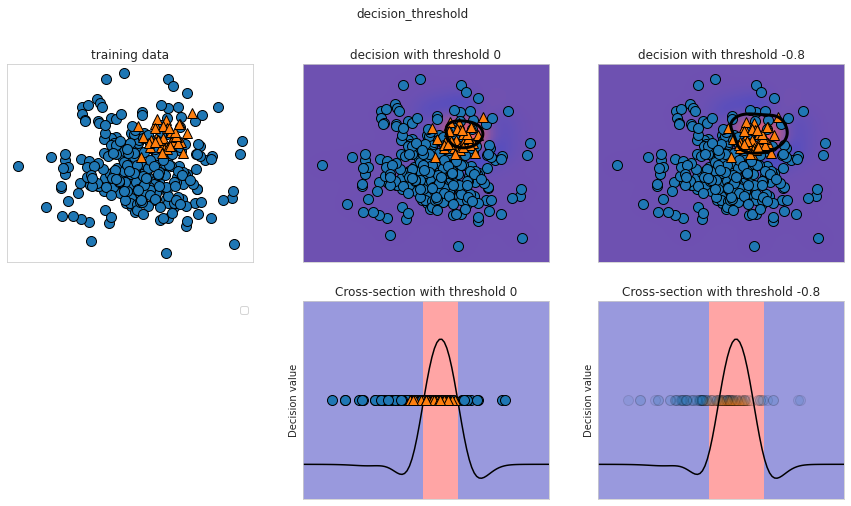

In [14]:
# 決定関数のヒートマップと、決定スレッショルドを変更した場合の影響
mglearn.plots.plot_decision_threshold()

In [15]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [16]:
# クラス1の再現率を高めたい（より多くのデータポイントがクラス1に分類されるようにしたい）ので、スレッショルドを小さくしてみる
y_pred_lower_threshold = svc.decision_function(X_test) > -.8
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



<h4>適合率-再現率カーブとROCカーブ</h4>

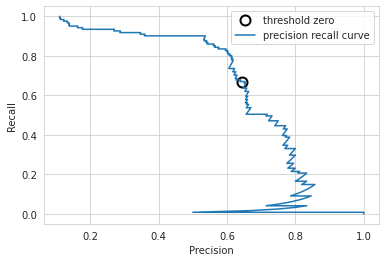

In [17]:
# 再現率90%のように、クラス分類器に要請を設定することを、しばしば作動ポイントの設定と呼ぶ
# すべての可能なスレッショルド、すなわちすべての可能な適合率と再現率の組合せを見るには、適合率-再現率カーブと呼ばれるものを用いる
# sklearn.metricsモジュールに適合率-再現率カーブを計算する関数precision_recall_curveがある
# この関数は、実際のラベル情報と、decision_functionかpredict_probaで予測された不確実性を必要とする
# この関数は、すべての可能なスレッショルドに対する適合率と再現率の値のリストをソートして返すのでプロットすることができる
# カーブが右上の角に近ければ近いほど、良いクラス分類器であるということになる。つまりあるスレッショルドに対して、適合率が高く、同時に再現率も高い
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
# 滑らかなグラフを描くために、データを増幅して、改めてprecision_recall_curveを呼び出す
X, y = make_blobs(n_samples = (4000, 500), cluster_std = [7.0, 2], random_state = 22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
svc = SVC(gamma = .05).fit(X_train, y_train)
precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], "o", markersize = 10, label = "threshold zero", fillstyle = "none", c = "k", mew = 2)
plt.plot(precision, recall, label = "precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc = "best")

(1125, 2)
f1_score of random forest: 0.610
f1_score if svc: 0.656


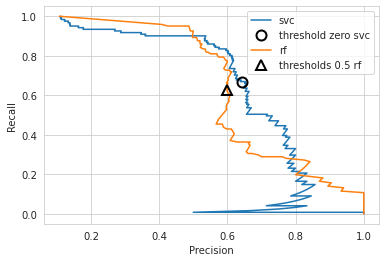

In [18]:
# 得意とするカーブの部分、すなわち作動ポイントは、クラス分類器によって異なる
# f-値はデフォルトのスレッショルドで与えられる一点を表しているに過ぎない
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 0, max_features = 2)
rf.fit(X_train, y_train)
print(rf.predict_proba(X_test).shape)
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(precision, recall, label = "svc")
plt.plot(precision[close_zero], recall[close_zero], "o", markersize = 10, label = "threshold zero svc", fillstyle = "none", c = "k", mew = 2)
plt.plot(precision_rf, recall_rf, label = "rf")
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], "^", 
         c = "k", markersize = 10, label = "thresholds 0.5 rf", fillstyle = "none", mew = 2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc = "best")

print(f"f1_score of random forest: {f1_score(y_test, rf.predict(X_test)):.3f}")
print(f"f1_score if svc: {f1_score(y_test, svc.predict(X_test)):.3f}")

In [19]:
# 自動的にモデルを比較するには、このカーブに含まれている情報を、特定のスレッショルドもしくは作動ポイントによらずまとめる方法が必要が
# 適合率-再現率カーブを要約する方法の一つが、カーブの下の領域を積分する方法である。これは平均適合率（average precision）とも呼ばれる
# 平均適合率は、0から1までのカーブの下の領域なので、平均適合率の値は0(最悪値)から1(最良値)までとなる
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:,1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print(f"Average precision of random forest: {ap_rf:.3f}")
print(f"Average precision of svc: {ap_svc:.3f}")

Average precision of random forest: 0.660
Average precision of svc: 0.666


<h4>受信者動作特性（ROC）とAUC</h4>

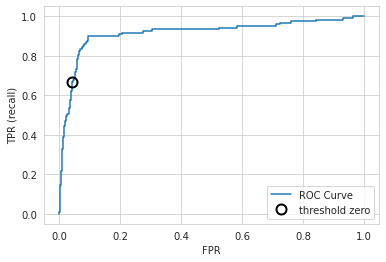

In [20]:
# 様々なスレッショルドにおけるクラス分類器の挙動を解析するためによく使われるもう一つの道具として、
# 受信者動作特性カーブ（receiver operating characteristics curve）略してROCカーブがある
# 適合率-再現率カーブと同様に、ROCカーブは与えられたクラス分類器のすべてのスレッショルドを考慮するが、適合率と再現率の代わりに、
# 偽陽性率（false positive rate:FPR）を真陽性率（true positive rate:TPR）に対してプロットする
# 真陽性率は再現率の別名だが、偽陽性率は、すべての陰性サンプルの個数に対する偽陽性数の割合である
# FPR = FP / (FP + TN)
# ROCカーブにおいては、理想的な点は左上に近い点だ・つまり、低い偽陽性率を保ちながら高い再現率を達成するのが理想だ
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label = "ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize = 10, label = "threshold zero", fillstyle = "none", c = "k", mew = 2)
plt.legend(loc = "best")

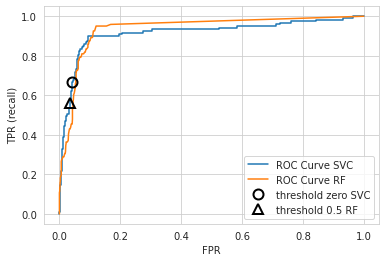

In [21]:
from sklearn.metrics import roc_curve

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label = "ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label = "ROC Curve RF")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], "o", markersize = 10, label = "threshold zero SVC", fillstyle = "none", c = "k", mew = 2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr[close_default_rf], tpr[close_default_rf], "^", markersize = 10, label = "threshold 0.5 RF", fillstyle = "none", c = "k", mew = 2)
plt.legend(loc = "best")

In [22]:
# 適合率-再現率カーブと同様に、カーブの下の領域面積を用いて、ROCカーブを一つの値にまとめることができる
# ROCカーブの下の領域（area under the curve）を略して一般にAUCと呼ぶ
# ROCは0から1までのカーブの下の領域なので、AUCスコアは常に0(最悪値)から1(最良値)の間になる
# ランダムに予測するようなクラス分類器に対しては、どんなにクラスが偏ったデータセットであっても、AUCは常に0.5になる
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print(f"AUC for Random Forest: {rf_auc:.3f}")
print(f"AUC for SVC: {svc_auc:.3f}")

AUC for Random Forest: 0.937
AUC for SVC: 0.916


gamma = 1.00 accuracy = 0.90 auc = 0.50
gamma = 0.05 accuracy = 0.90 auc = 1.00
gamma = 0.01 accuracy = 0.90 auc = 1.00


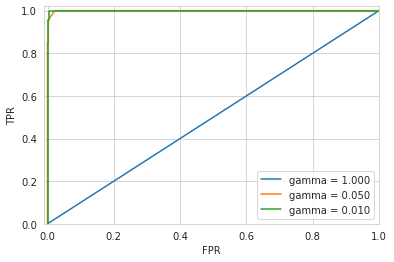

In [23]:
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state = 0)

plt.figure()
for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma = gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print(f"gamma = {gamma:.2f} accuracy = {accuracy:.2f} auc = {auc:.2f}")
    plt.plot(fpr,tpr,label = f"gamma = {gamma:.3f}")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0,1.02)
plt.legend(loc = "best")

<h4>多クラス分類の基準</h4>

In [24]:
# 多クラス分類の基準はすべて2クラス分類の基準から導出されたもので、すべてのクラスに対して平均を取ったものである
# 2クラス分類の場合と同様に、多クラス分類の精度は正確にクラス分類されたサンプルの割合である
# 精度以外の一般的なツールには、前節で見た混同行列とクラス分類レポートがある
# 偏ったデータセットに対する多クラス分類問題で最もよく用いられる基準は、多クラス版のf-値である。多クラスf-値は次のように求める
# まず、個々のクラスに対してそのクラスを陽性、他のクラスを陰性として2クラスf-値を計算する。次に、このクラスごとのf-値を、次のようにして平均する
# "macro"平均は、重みをつけずにクラスごとのf-値を平均する。クラスのサイズを考慮せずに、全てのクラスに同じ重みを与える
# "weighted"平均は、各クラスの支持度に応じて重みをつけて、クラスごとのf-値を平均する。クラス分類レポートで表示されるのはこの値だ
# "micro"平均は、すべてのクラスの偽陽性、偽陰性、真陽性の総数を計算し、その値を用いて、適合率、再現率、f-値を計算する
# 個々のサンプルを同じように重視するのであれば、"micro"平均を使う。個々のクラスを同じように重視するのであれば、"macro"平均を使う
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state = 0)
lr = LogisticRegression(max_iter = 10000).fit(X_train, y_train)
pred = lr.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, pred):.3f}")
print(f"Confusion matrix:\n{confusion_matrix(y_test, pred)}")

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  1  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  1  0 43  0]
 [ 0  0  0  0  0  1  0  0  2 44]]


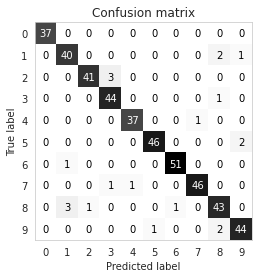

In [25]:
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel = "Predicted label", ylabel = "True label",
                                    xticklabels = digits.target_names, yticklabels = digits.target_names, cmap = plt.cm.gray_r, fmt = "%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [26]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.93      0.92        43
           2       0.98      0.93      0.95        44
           3       0.92      0.98      0.95        45
           4       0.97      0.97      0.97        38
           5       0.98      0.96      0.97        48
           6       0.98      0.98      0.98        52
           7       0.98      0.96      0.97        48
           8       0.90      0.90      0.90        48
           9       0.94      0.94      0.94        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [27]:
print(f"Micro average f1 score: {f1_score(y_test, pred, average = 'micro'):.3f}")
print(f"Macro average f1 score: {f1_score(y_test, pred, average = 'macro'):.3f}")

Micro average f1 score: 0.953
Macro average f1 score: 0.954


In [28]:
# AUCのような基準を、GridSearchCVやcross_val_scoreによるモデル選択で用いたいという場合も多いだろう
# GridsearchCVにもcross_val_scoreにもあるscoringという引数を用いる。利用したい評価基準を文字列で与えるだけでよい
# デフォルトの基準（精度）からAUCに変更するには、"roc_auc"をscoringパラメータに与えればよい
# クラス分類におけるscoringパラメータの値として重要なものとしては以下
# accuracy(デフォルト)、roc_auc(ROCカーブ下領域:AUC)、average_precison(適合率-再現率カーブ下領域)、f-値、f値_macro、f値_micro、f値_weighted
# 回帰でよく用いられるのは、r2(決定係数)、mean_squared_error(平均二乗誤差)、mean_absolute_error(平均絶対誤差)だ
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

digits = load_digits()
print(f"Default scoring: {cross_val_score(SVC(), digits.data, digits.target == 9)}") # scoring = "accuracy"が default
explicit_accuracy = cross_val_score(SVC(), digits.data, digits.target == 9, scoring = "accuracy")
print(f"Explicit accuracy scoring: {explicit_accuracy}")
roc_auc = cross_val_score(SVC(), digits.data, digits.target == 9, scoring = "roc_auc")
print(f"AUC scoring: {roc_auc}")

Default scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
Explicit accuracy scoring: [0.975      0.99166667 1.         0.99442897 0.98050139]
AUC scoring: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target == 9, random_state = 0)
param_grid = {"gamma":[0.0001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(SVC(), param_grid = param_grid)
grid.fit(X_train, y_train)
print("Grid-Search with accuracy")
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation score(accuracy): {grid.best_score_:.3f}")
print(f"Test set AUC: {roc_auc_score(y_test, grid.decision_function(X_test)):.3f}")
print(f"Test set accuracy: {grid.score(X_test, y_test):.3f}")

Grid-Search with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score(accuracy): 0.976
Test set AUC: 0.992
Test set accuracy: 0.973


In [30]:
# AUCをスコアに用いる
grid = GridSearchCV(SVC(), param_grid = param_grid, scoring = "roc_auc")
grid.fit(X_train, y_train)
print("Grid-Search with AUC")
print(f"Best parameters:", grid.best_params_)
print(f"Best cross-validation score (AUC): {grid.best_score_:.3f}")
print(f"Test set AUC: {grid.score(X_test, y_test):.3f}")

Grid-Search with AUC
Best parameters: {'gamma': 0.01}
Best cross-validation score (AUC): 0.998
Test set AUC: 1.000
